# Midterm Quiz 1  - Interactive Lab (Neural Networks)


**Names:** SERRANO, Jio A.<br>
**Course and Section:** CPE019 - CPE32S3 <br>
**Date of Submission**: April 3, 2024 <br>
**Instructor:** Engr. Roman Richard<br>


### Importing Dataset

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
phiusiil_phishing_url_website = fetch_ucirepo(id=967)

# data (as pandas dataframes)
X = phiusiil_phishing_url_website.data.features
y = phiusiil_phishing_url_website.data.targets

# metadata
print(phiusiil_phishing_url_website.metadata)

# variable information
print(phiusiil_phishing_url_website.variables)


{'uci_id': 967, 'name': 'PhiUSIIL Phishing URL (Website)', 'repository_url': 'https://archive.ics.uci.edu/dataset/967/phiusiil+phishing+url+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/967/data.csv', 'abstract': 'PhiUSIIL Phishing URL Dataset is a substantial dataset comprising 134,850 legitimate and 100,945 phishing URLs. Most of the URLs we analyzed, while constructing the dataset, are the latest URLs. Features are extracted from the source code of the webpage and URL. Features such as CharContinuationRate, URLTitleMatchScore, URLCharProb, and TLDLegitimateProb are derived from existing features.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 235795, 'num_features': 54, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['label'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2024, 'last_updated': 'Mon Mar 18 

**Remarks**: The `X` variable contains the input features of the independent variable while the `y` variable contains the target features or the dependent variable. From the results of the `print` commands above, we can see that there are no Null values present in the dataset for all of the columns, we will further verify this later in the **Exploratory Analysis** part.

### Exploratory Analysis

#### Verification of Dataset Import

To check if the dataset has been successfully imported, we will use the `head()` method to display some of its rows.

In [ ]:
X.head() #input features

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,0.061933,...,1,0,0,1,34,20,28,119,0,124
1,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,0.050207,...,0,0,0,1,50,9,8,39,0,217
2,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,0.064129,...,0,0,0,1,10,2,7,42,2,5
3,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,0.057606,...,0,1,1,1,3,27,15,22,1,31
4,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,0.059441,...,1,1,0,1,244,15,34,72,1,85


In [ ]:
y.head() #target variable

,label
0,1
1,1
2,1
3,1
4,1


#### Checking for Null Values

In [ ]:
X.info() # independent (input features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 54 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URL                         235795 non-null  object 
 1   URLLength                   235795 non-null  int64  
 2   Domain                      235795 non-null  object 
 3   DomainLength                235795 non-null  int64  
 4   IsDomainIP                  235795 non-null  int64  
 5   TLD                         235795 non-null  object 
 6   URLSimilarityIndex          235795 non-null  float64
 7   CharContinuationRate        235795 non-null  float64
 8   TLDLegitimateProb           235795 non-null  float64
 9   URLCharProb                 235795 non-null  float64
 10  TLDLength                   235795 non-null  int64  
 11  NoOfSubDomain               235795 non-null  int64  
 12  HasObfuscation              235795 non-null  int64  
 13  NoOfObfuscated

In [ ]:
y.info() # dependent

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   label   235795 non-null  int64
dtypes: int64(1)
memory usage: 1.8 MB


**Remarks**: From the results of the `info()` method above, we can verify that there are no null values present in the dataset that could affect the training of our model later on. Checking the data types of the columns, we can also see that there are columns which have the `object` data type, a data type that could cause errors in our model training later on. Hence, we would have to redefine our input features without these columns.

#### Removing object Data Type

In [ ]:
X_mod = X.select_dtypes(exclude=['object']) # removing columns with object dtype
X_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 50 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URLLength                   235795 non-null  int64  
 1   DomainLength                235795 non-null  int64  
 2   IsDomainIP                  235795 non-null  int64  
 3   URLSimilarityIndex          235795 non-null  float64
 4   CharContinuationRate        235795 non-null  float64
 5   TLDLegitimateProb           235795 non-null  float64
 6   URLCharProb                 235795 non-null  float64
 7   TLDLength                   235795 non-null  int64  
 8   NoOfSubDomain               235795 non-null  int64  
 9   HasObfuscation              235795 non-null  int64  
 10  NoOfObfuscatedChar          235795 non-null  int64  
 11  ObfuscationRatio            235795 non-null  float64
 12  NoOfLettersInURL            235795 non-null  int64  
 13  LetterRatioInU

#### Identifying Input and Target Variables

The dataset has already been divided into two: `X` for the input features and `y` for the target variable. After removing the columns with object data type, the new input features will now be the `X_mod` variable.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471590 entries, 0 to 235794
Data columns (total 51 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URLLength                   235795 non-null  float64
 1   DomainLength                235795 non-null  float64
 2   IsDomainIP                  235795 non-null  float64
 3   URLSimilarityIndex          235795 non-null  float64
 4   CharContinuationRate        235795 non-null  float64
 5   TLDLegitimateProb           235795 non-null  float64
 6   URLCharProb                 235795 non-null  float64
 7   TLDLength                   235795 non-null  float64
 8   NoOfSubDomain               235795 non-null  float64
 9   HasObfuscation              235795 non-null  float64
 10  NoOfObfuscatedChar          235795 non-null  float64
 11  ObfuscationRatio            235795 non-null  float64
 12  NoOfLettersInURL            235795 non-null  float64
 13  LetterRatioInU

<Axes: >

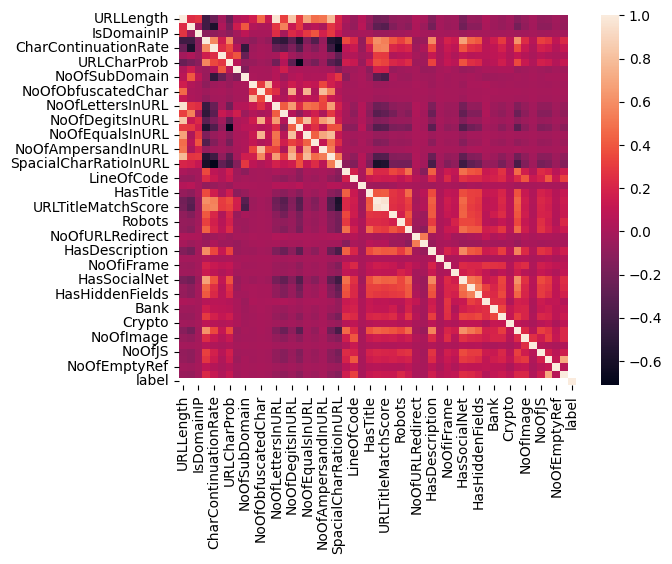

In [ ]:
frames = [X_mod, y]
df = pd.concat(frames)
df.info()

import seaborn as sns
correlation = df.corr()
sns.heatmap(correlation)

#### Checking for Outliers

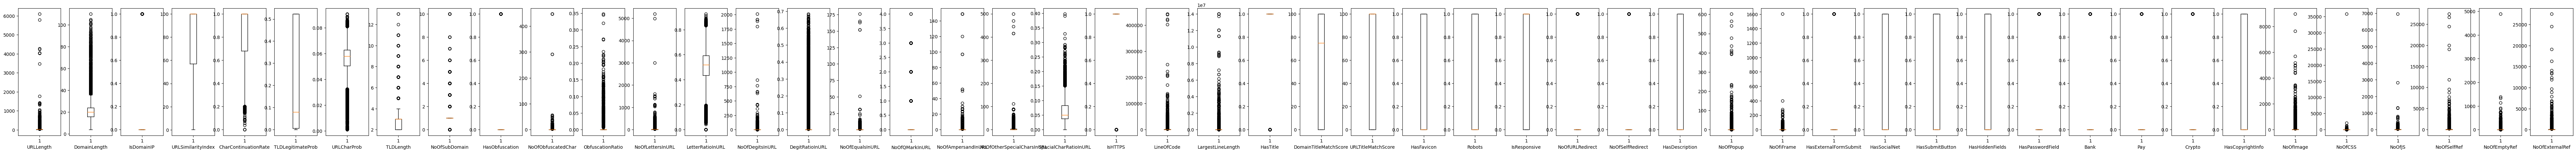

In [ ]:
import matplotlib.pyplot as plt

no_features = len(X_mod.columns)

fig, axs = plt.subplots(1, no_features, figsize=(100, 5))
features = X_mod.columns

for i in range(no_features):
  axs[i].boxplot(X_mod[features[i]])
  axs[i].set_xlabel(f"{features[i]}")


plt.show()

In [ ]:
columnsWithOutliers = ['URLLength', 'DomainLength', 'NoOfObfuscatedChar', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'LineOfCode', 'NoOfPopup', 'NoOfiFrame', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef']

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
X_mod.describe().loc[['mean', 'min', 'max', 'std']]

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
mean,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,0.002057,0.024861,0.000138,19.428919,0.515946,1.881011,0.028616,0.062241,0.029403,0.025056,2.340198,0.063309,0.782625,1141.900443,1.278953e+04,0.861261,50.131427,52.122098,0.361768,0.266541,0.624513,0.133438,0.040107,0.440183,0.221765,1.588638,0.043987,0.456570,0.414301,0.377799,0.102263,0.127089,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.200000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,447.000000,0.348000,5191.000000,0.926000,2011.000000,0.684000,176.000000,4.000000,149.000000,499.000000,0.397000,1.000000,442666.000000,1.397573e+07,1.000000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,602.000000,1602.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000
std,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,0.045306,1.876249,0.003817,29.090330,0.123315,11.886695,0.070897,0.934704,0.193505,0.836448,3.527603,0.032393,0.412461,3419.950513,1.522011e+05,0.345675,49.676981,49.600564,0.480513,0.442151,0.484249,0.340048,0.196210,0.496410,3.870540,5.762561,0.205067,0.498111,0.492602,0.484838,0.302994,0.333074,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430


Outliers can also be determined using the `describe()` method. As we can see, there are columns that have a huge discrepancy between their `mean` and `max` values. This is indicative that there are outliers in the values which can affect the performance of the model.

#### Removing Outliers

In [ ]:
# Create function that will accept the dataframe, the column name to be cleaned, and threshold
# Return the cleaned dataframe

def remove_outliers_iqr(df, column_name, thresh=1.5):
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - (thresh * IQR)
  upper_bound = Q3 + (thresh * IQR)

  return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

In [ ]:
# Remove outliers
dataDF = X_mod.copy()
features = columnsWithOutliers

for feature in features:
  dataDF = remove_outliers_iqr(dataDF, f'{feature}')

In [ ]:
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87996 entries, 2 to 235792
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   URLLength                   87996 non-null  int64  
 1   DomainLength                87996 non-null  int64  
 2   IsDomainIP                  87996 non-null  int64  
 3   URLSimilarityIndex          87996 non-null  float64
 4   CharContinuationRate        87996 non-null  float64
 5   TLDLegitimateProb           87996 non-null  float64
 6   URLCharProb                 87996 non-null  float64
 7   TLDLength                   87996 non-null  int64  
 8   NoOfSubDomain               87996 non-null  int64  
 9   HasObfuscation              87996 non-null  int64  
 10  NoOfObfuscatedChar          87996 non-null  int64  
 11  ObfuscationRatio            87996 non-null  float64
 12  NoOfLettersInURL            87996 non-null  int64  
 13  LetterRatioInURL            87

The above code removed all the outliers from the input features. We will then join this result with the target variable to form the new cleaned dataframe.

In [ ]:
cleanedDF = pd.concat([dataDF, y], axis=1, join="inner")

In [ ]:
cleanedDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87996 entries, 2 to 235792
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   URLLength                   87996 non-null  int64  
 1   DomainLength                87996 non-null  int64  
 2   IsDomainIP                  87996 non-null  int64  
 3   URLSimilarityIndex          87996 non-null  float64
 4   CharContinuationRate        87996 non-null  float64
 5   TLDLegitimateProb           87996 non-null  float64
 6   URLCharProb                 87996 non-null  float64
 7   TLDLength                   87996 non-null  int64  
 8   NoOfSubDomain               87996 non-null  int64  
 9   HasObfuscation              87996 non-null  int64  
 10  NoOfObfuscatedChar          87996 non-null  int64  
 11  ObfuscationRatio            87996 non-null  float64
 12  NoOfLettersInURL            87996 non-null  int64  
 13  LetterRatioInURL            87

In the above result, we can see that the instances were down to 87996 after removing the outliers. We will then verify if the cleaned dataframe can be used for our training.

In [ ]:
X_cleaned = cleanedDF.drop('label', axis=1)
X_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87996 entries, 2 to 235792
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   URLLength                   87996 non-null  int64  
 1   DomainLength                87996 non-null  int64  
 2   IsDomainIP                  87996 non-null  int64  
 3   URLSimilarityIndex          87996 non-null  float64
 4   CharContinuationRate        87996 non-null  float64
 5   TLDLegitimateProb           87996 non-null  float64
 6   URLCharProb                 87996 non-null  float64
 7   TLDLength                   87996 non-null  int64  
 8   NoOfSubDomain               87996 non-null  int64  
 9   HasObfuscation              87996 non-null  int64  
 10  NoOfObfuscatedChar          87996 non-null  int64  
 11  ObfuscationRatio            87996 non-null  float64
 12  NoOfLettersInURL            87996 non-null  int64  
 13  LetterRatioInURL            87

In [ ]:
y_cleaned = cleanedDF[['label']].copy()
y_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87996 entries, 2 to 235792
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   label   87996 non-null  int64
dtypes: int64(1)
memory usage: 1.3 MB


#### Verification of the Usability of `cleanedDF` and Checking Imbalance

In [ ]:
y_cleaned['label'].value_counts()

1    48396
0    39600
Name: label, dtype: int64

In [ ]:
print(39600 / (48396+39600))

0.4500204554752489


We can see that after removing the outliers, the dataset is still pretty balanced with the minority being aproximately 45% of the whole dataset. We will use the `X_cleaned` and `y_cleaned` dataframes moving forward.

#### Splitting the Dataset

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2,
                                                    random_state = 20)


X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mod, y, test_size=0.2,
                                                    random_state = 20)

Splitting the dataset is necessary to train the model properly. Here we have the `X_train` and `y_train` which will be used for training the model and the `X_test` and `y_test` will be used to evaluate the performance of the model.

#### Scaling the Dataset



In [ ]:
# Bring the features to the same range (Data Scaling)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.fit_transform(X_test2)

#### Training the Model



In [ ]:
# Importing modules

import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Activation
import matplotlib.pyplot as plt

In [ ]:
# Form the Input, hidden, and output layers.

model = Sequential([
	# dense layer 1
	Dense(128, activation='relu'),
	# dense layer 2
	Dense(64, activation='relu'),
	# output layer
	Dense(6, activation='softmax'),
])

tf.random.set_seed(10)

# Compile the model

model.compile(optimizer='adam',
			loss='sparse_categorical_crossentropy',
			metrics=['accuracy'])

# Fit the model

history = model.fit(X_train_scaled, y_train, epochs=5, batch_size=50, validation_split=0.2)

Epoch 1/5
1127/1127 [==============================] - 4s 3ms/step - loss: 0.0154 - accuracy: 0.9970 - val_loss: 3.4637e-04 - val_accuracy: 1.0000
Epoch 2/5
1127/1127 [==============================] - 3s 2ms/step - loss: 4.0989e-04 - accuracy: 0.9998 - val_loss: 1.8892e-04 - val_accuracy: 0.9999
Epoch 3/5
1127/1127 [==============================] - 3s 2ms/step - loss: 2.3357e-04 - accuracy: 0.9999 - val_loss: 1.8970e-04 - val_accuracy: 0.9999
Epoch 4/5
1127/1127 [==============================] - 2s 2ms/step - loss: 3.8838e-04 - accuracy: 0.9999 - val_loss: 4.3762e-04 - val_accuracy: 0.9998
Epoch 5/5
1127/1127 [==============================] - 3s 2ms/step - loss: 2.2566e-04 - accuracy: 0.9999 - val_loss: 2.8442e-04 - val_accuracy: 0.9999


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0, 0.5, 'loss')

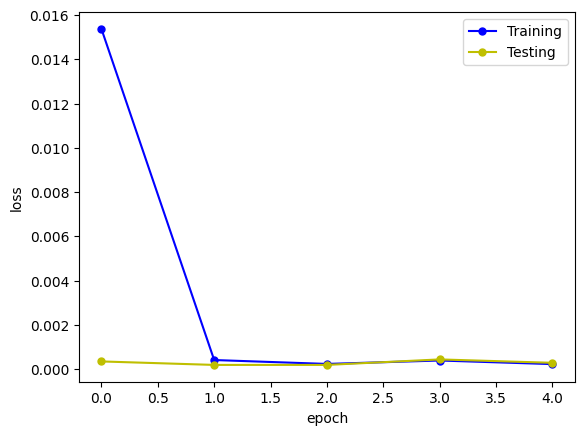

In [ ]:
plt.plot(history.history['loss'], "bo-", markersize = 5) #blue
plt.plot(history.history['val_loss'], "yo-", markersize = 5) #yellow
plt.legend(["Training", "Testing"])
plt.xlabel("epoch")
plt.ylabel("loss")

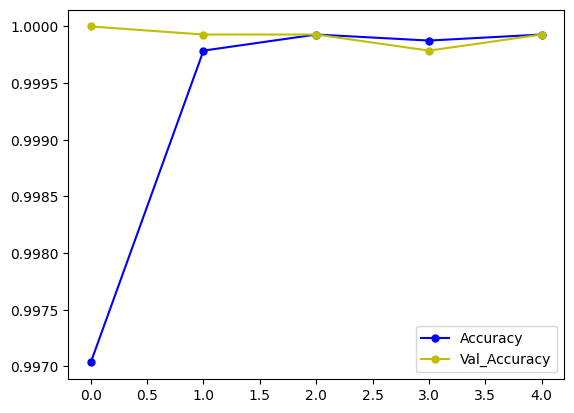

In [ ]:
plt.plot(history.history['accuracy'], "bo-", markersize = 5) #blue
plt.plot(history.history['val_accuracy'], "yo-", markersize = 5) #yellow
plt.legend(["Accuracy", "Val_Accuracy"])

In [ ]:
# Find the accuracy of the model

results = model.evaluate(X_test_scaled, y_test, verbose = 1)
print('test loss, test acc:', results)


550/550 [==============================] - 1s 1ms/step - loss: 4.4373e-04 - accuracy: 0.9999
test loss, test acc: [0.0004437289317138493, 0.999943196773529]


After testing the model with the testing data, `X_test_scaled` and `y_test`, the accuracy obtained was 0.9999 with a loss of 4.4373e-04.

#### From Activity 6.1

In [ ]:
#Preliminaries
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def sigmoid(x):
    """
    Sigmoid function
    """
    return 1.0 / (1.0 + np.exp(-x))

def relu(x):
    """
    ReLU functin
    """
    return (np.maximum(0, x))


def loss_fn(y_true, y_pred, eps=1e-16):
    """
    Loss function we would like to optimize (minimize)
    We are using Logarithmic Loss
    http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss
    """
    y_pred = np.maximum(y_pred,eps)
    y_pred = np.minimum(y_pred,(1-eps))
    return -(np.sum(y_true * np.log(y_pred)) + np.sum((1-y_true)*np.log(1-y_pred)))/len(y_true)


def forward_pass(W1, W2):
    """
    Does a forward computation of the neural network
    Takes the input `x_mat` (global variable) and produces the output `y_pred`
    Also produces the gradient of the log loss function
    """
    global x_mat
    global y_train
    global num_

    # First, compute the new predictions `y_pred`
    z_2 = np.dot(x_mat, W_1)
    a_2 = sigmoid(z_2)
    z_3 = np.dot(a_2, W_2)
    y_pred = sigmoid(z_3).reshape((len(x_mat), ))

    # Now compute the gradient
    J_z_3_grad = -y_train + y_pred
    J_W_2_grad = np.dot(J_z_3_grad, a_2)
    # J_W_2_grad = np.dot(a_2.T, J_z_3_grad.reshape(-1, 1))
    a_2_z_2_grad = sigmoid(z_2)*(1-sigmoid(z_2))
    J_W_1_grad = (np.dot((J_z_3_grad).reshape(-1,1), W_2.reshape(-1,1).T)*a_2_z_2_grad).T.dot(x_mat).T
    # J_W_1_grad = np.dot(x_mat.T, np.dot(J_z_3_grad.reshape(-1, 1), W2.T) * a_2_z_2_grad)
    gradient = (J_W_1_grad, J_W_2_grad)

    # return
    return y_pred, gradient


def plot_loss_accuracy(loss_vals, accuracies):
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle('Log Loss and Accuracy over iterations')

    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss_vals)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Log Loss')

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Accuracy');

In [ ]:
#### Initialize the network parameters

input_size = X_train_scaled.shape[1]
hidden_nodes = 4
output_size = 1

np.random.seed(1241)

# Initialize weight matrices
W_1 = np.random.uniform(-1, 1, size=(input_size, hidden_nodes))
W_2 = np.random.uniform(-1, 1, size=(hidden_nodes, output_size))

num_iter = 1001 # arbitrarily chosen
learning_rate = 0.003 # arbitrarily chosen
x_mat = X_train_scaled

loss_vals, accuracies = [], []

for i in range(num_iter):
    ### Do a forward computation, and get the gradient
    y_pred, gradient = forward_pass(W_1, W_2)

    ## Update the weight matrices
    W_1 -= learning_rate * gradient[0]
    W_2 -= learning_rate * gradient[1]

    ### Compute the loss and accuracy
    loss = loss_fn(y_cleaned, y_pred)
    loss_vals.append(loss)

    accuracy = np.mean((y_pred >= 0.5) == y_cleaned)
    accuracies.append(accuracy)

    ## Print the loss and accuracy for every 200th iteration
    if (i >= 200 and i % 200 == 0):
      print(f"Iteration {i}: Loss = {loss:.4f}, Accuracy = {accuracy:.4f}")


plot_loss_accuracy(loss_vals, accuracies)

In [ ]:
y_cleaned.shape

(87996, 1)

#### From Activity 6.2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [ ]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

In [ ]:
model  = Sequential([
    Dense(12, input_shape=(50,), activation="relu"),
    Dense(12, activation="sigmoid"),
    Dense(1, activation="sigmoid")
])

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 12)                612       
                                                                 
 dense_21 (Dense)            (None, 12)                156       
                                                                 
 dense_22 (Dense)            (None, 1)                 13        
                                                                 
Total params: 781 (3.05 KB)
Trainable params: 781 (3.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=5)

Epoch 1/5
2200/2200 [==============================] - 6s 3ms/step - loss: 0.0015 - accuracy: 0.9998 - val_loss: 0.0016 - val_accuracy: 0.9998
Epoch 2/5
2200/2200 [==============================] - 5s 2ms/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.0015 - val_accuracy: 0.9998
Epoch 3/5
2200/2200 [==============================] - 4s 2ms/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.0014 - val_accuracy: 0.9998
Epoch 4/5
2200/2200 [==============================] - 4s 2ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0013 - val_accuracy: 0.9998
Epoch 5/5
2200/2200 [==============================] - 6s 3ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0012 - val_accuracy: 0.9998


In [ ]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

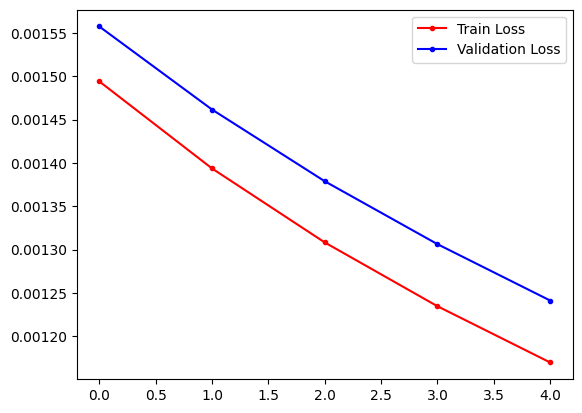

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

In [ ]:
y_pred_class_nn_2 = (model.predict(X_test_scaled) > 0.5).astype("int32")
y_pred_prob_nn_2 = model.predict(X_test_scaled)

550/550 [==============================] - 1s 1ms/step


In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

accuracy is 1.000
roc-auc is 1.000


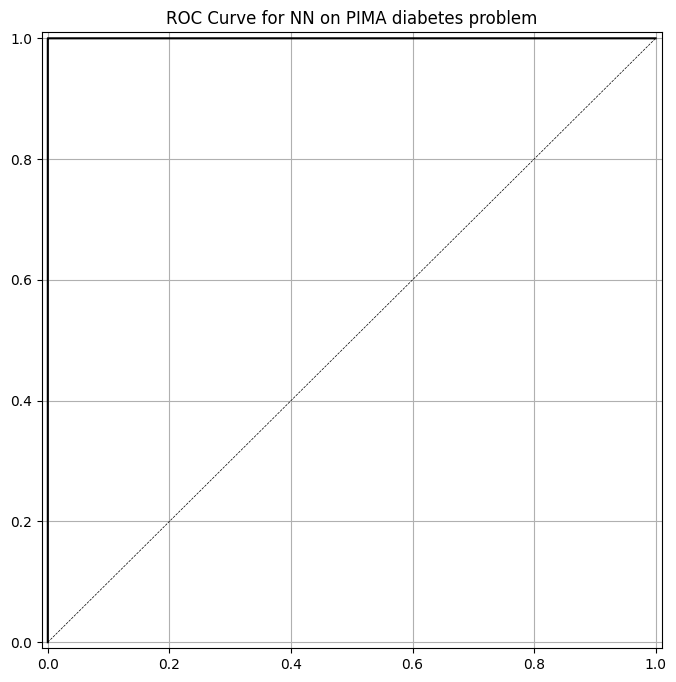

In [ ]:
# Plot the roc curve for the predictions

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_2)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_2)))

plot_roc(y_test, y_pred_prob_nn_2, 'NN')

The model achieved an accuracy score of 0.999 and ROC-AUC score of 1.000.